# This is a kinematic example for a articulated robot arm with 6 joints

As a basic example think of a cube, that is to be processed in several steps to transfer it from its initial state to a defined target state.

Initial state of cube:

![image of initial cube](images/initial_cube.PNG "initial cube")

After the 1st processing step the cube is supposed to look like this:

1st intermediate state of cube:

![image of cut cube](images/cut_cube.PNG "cut cube")

To calculate the tool path for the robot to execute this processing, a CAD/CAM system compares these two CAD-files and determines the tool path for a specific milling tool, that is required to execute this processing step. In this case, this tool path would just be a straight line in Cartesian space. The motion commands needed by the robot control to execute the planned tool path are stored in a nc-file. This is send to the robot control and there transformed from operating space (Cartesian) to joint space (angular). Let's do this step by step, until we know the joint angles.

First of all the kinematics of the robot are initialized specifying its link lengths.

In [1]:
import RobotClass as rc
import warnings
warnings.filterwarnings('ignore')

# these are part of the Denavit-Hartenber-parameter that define the kinematics of a manipulator

# nominal link lengths
dh_parameter = {
    'l11': 550,
    'l12': 450,
    'l2': 860,
    'l3': 210,
    'l4': 762,
    'l5': 0,
    'l6': 210
}

kin = rc.kinematic(dh_parameter)



robot kinematics initialized


Then the $n$ positions ($x$, $y$, $z$) and orientations ($\alpha$, $\beta$, $\gamma$) of the Tool Center Point (TCP) of the robot for the needed linear motion in Cartesian space are obtained here by linear interpolation between the start and end points (these coordinates would otherwise be calculated by the CAD/CAM system).

In [2]:
tcp_xyz_abg = kin.linear_interpolation(
    [1000, 0, 2000], [1000, 100, 2000], 
    [90, 0, 90], [90, 0, 90], 
    10
    ) 



linear motion interpolated


Now let's have a look at the tool path.

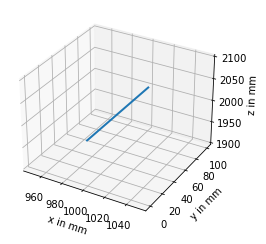

In [3]:
kin.plot_tcp_3d([tcp_xyz_abg])

Not surprisingly, it's a perfect straight line in Cartesian space. Now applying the inverse kinematic transformation the joint angles corresponding to the TCP path are determined.

In [4]:
joint_angles = kin.inverse(tcp_xyz_abg)

Again, let's have a look at them.

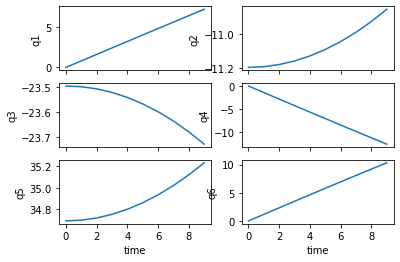

In [5]:
kin.plot_joint_angles(joint_angles)

Now it is important to keep in mind, that these joint angles correspond to the nominal robot link lengths, that we specified earlier. If we redefine them slightly and then direct transform these new (actual) joint angles to Cartesian space (as would be done by the physical real robot), the actual tool path would appear different.

In [6]:
# actual link lengths
dh_parameter = {
    'l11': 550+3,
    'l12': 450-5,
    'l2': 860+5,
    'l3': 210+4,
    'l4': 762+7,
    'l5': 0+2,
    'l6': 210+3
}

kin = rc.kinematic(dh_parameter)



robot kinematics initialized


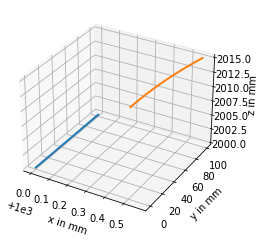

In [7]:
tcp_xyz_abg1 = kin.direct(joint_angles)
kin.plot_tcp_3d([tcp_xyz_abg, tcp_xyz_abg1])